# Test 2 - Question 3
## Student: Luis Vasquez Espinoza

Q: **Multiple linear regression for large dataset**

The body fat dataset from the Statlib data server gives estimates of the percentage of body fat determined by underwater weighing and various body circumference measurements for 252 men. It is of interest to develop an equation to estimate body fat from the circumference measurements; fordetails, see the description of the dataset and the biological context at

http://lib.stat.cmu.edu/datasets/bodyfat

The outcome variable is y, percent bodyfat estimated from Siri’s equation (%), and the predictors of interest are: age (years), weight (pounds), height (inches), and circumferences (all in cm) of neck,chest, abdomen, hip, thigh, knee, ankle, biceps, forearm, and wrist.

1) Use the data to determine a good model for predicting percent bodyfat from the other variables(except body density!).

2) Evaluate the model assumptions carefully using residuals and diagnostics. Make decisions about whether any observations should be omitted from analysis.
___

I found a .csv file corresponding to the body fat dataset in [this](http://staff.pubhealth.ku.dk/~tag/Teaching/share/data/Bodyfat.csv) link.
___

### **1. Getting a 'good' model for predicting 'bodyfat' from the other features (except 'Density')** 

In [1]:
import pandas as pd

In [2]:
fat_df = pd.read_csv('Bodyfat.csv')
fat_df

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [3]:
import numpy as np

# Preparing data indices
x_features = list(fat_df)
x_features.remove('Density')
x_features.remove('bodyfat')
y_feature = 'bodyfat'

# Setting data
x = fat_df[x_features].to_numpy()
y = fat_df[y_feature].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, random_state=123)

In [5]:
from sklearn.linear_model import LinearRegression

naive_lr = LinearRegression()
naive_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
from sklearn.metrics import median_absolute_error

print(naive_lr.score(x_train, y_train))
print(naive_lr.score(x_test, y_test))
print(median_absolute_error(y_train, naive_lr.predict(x_train)))
print(median_absolute_error(y_test, naive_lr.predict(x_test)))

0.7553384357544444
0.6707957933633817
3.1300493882644336
3.39871288838315


In [7]:
lr = LinearRegression().fit(x, y)
lr.score(x,y)

0.749049969148275

___

### **2. Evaluating parameters and possibly discard data and features** 

In [8]:
fat_df = fat_df.drop(['Density'], axis=1)

In [9]:
fat_df.corr().abs()

,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
bodyfat,1.000000,0.291458,0.612414,0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Age,0.291458,1.000000,0.012746,0.171645,0.113505,0.176450,0.230409,0.050332,0.200096,0.017516,0.105058,0.041162,0.085056,0.213531
Weight,0.612414,0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,0.089495,0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,0.625201,0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,0.559608,0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685
Knee,0.508665,0.017516,0.853167,0.286053,0.672405,0.719496,0.737179,0.823473,0.799170,1.000000,0.611608,0.678709,0.555898,0.664507


After checking the correlations of the involved features, some of the attributes wont be consider for their excesive correlations with each other, and the low correlation with the target (bodyfat). Next, the features in bold are the ones considered to be kept from the original dataframe, for having the best correlation between the two with 'bodyfat'.

Excesive correlations over features:
* Weight and **Hip**
* Chest and **Abdomen**

Insignificant correlations:
* Height

In [10]:
fat_df = fat_df.drop(['Weight', 'Chest', 'Height'], axis=1)

In [11]:
fat_df.corr().abs()['bodyfat'].sort_values(ascending=False)

bodyfat    1.000000
Abdomen    0.813432
Hip        0.625201
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Name: bodyfat, dtype: float64

In [12]:
fat_df

,bodyfat,Age,Neck,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,36.2,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,38.5,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,34.0,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,37.4,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,34.4,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...
247,11.0,70,34.9,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,33.6,72,40.9,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,29.3,72,38.9,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,26.0,72,38.9,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


Next, I'll evaluate the remaining  features graphically, in order to find some oulier data 

(0.0, 1.0, 0.0, 1.0)

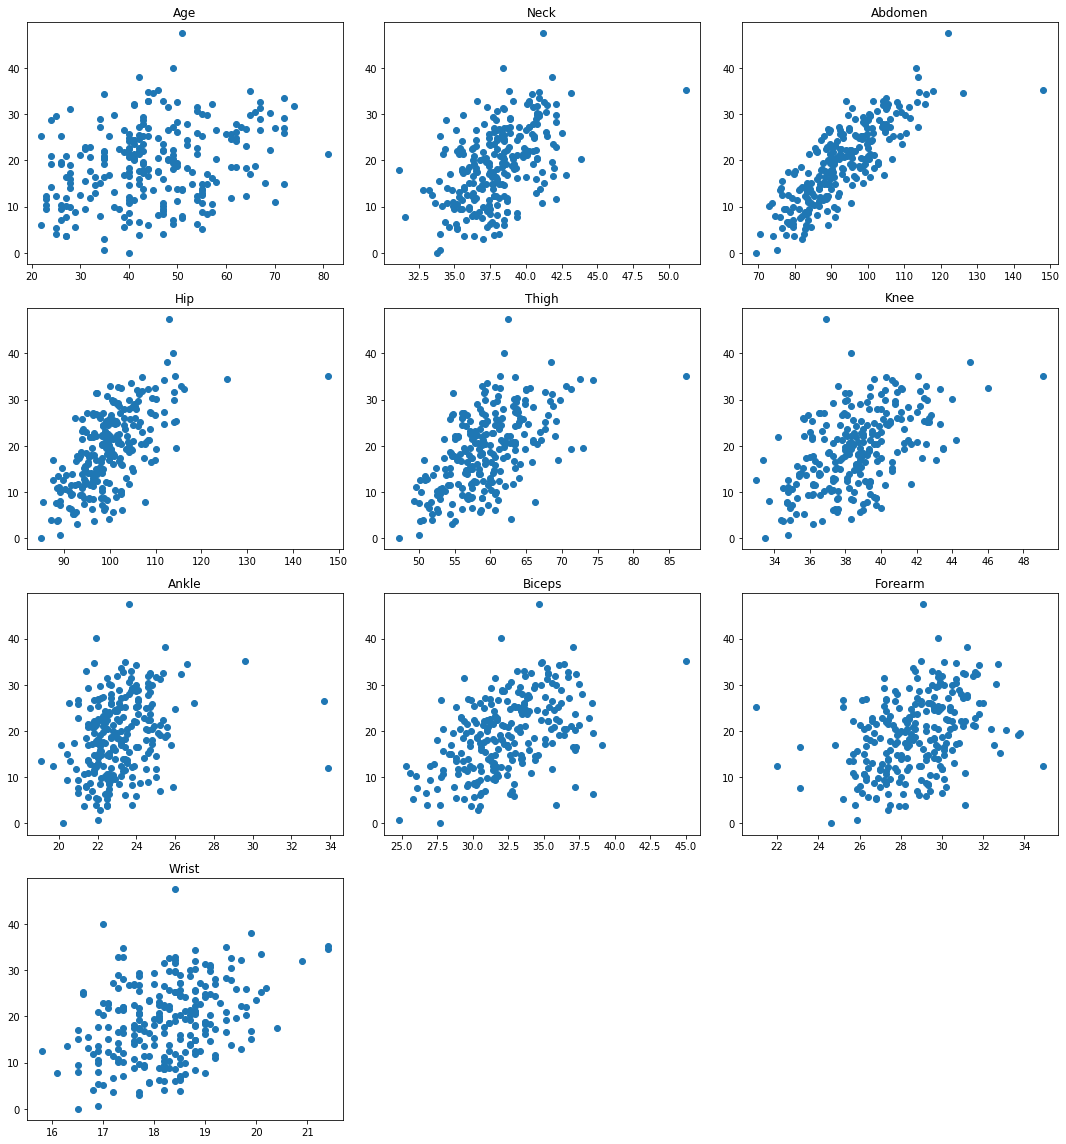

In [14]:
# Plotting all dependencies to bodyfat
import matplotlib.pyplot as plt

to_plot_features = list(fat_df.columns)
to_plot_features.remove('bodyfat')

fig, axs = plt.subplots(4, 3, figsize=(15,16))

for ax, feature in zip(axs.reshape(-1), to_plot_features):
    ax.scatter(fat_df[feature], fat_df['bodyfat'])
    ax.set_title(feature)

fig.tight_layout()
axs.reshape(-1)[-1].axis('off')
axs.reshape(-1)[-2].axis('off')

From the plots, the **outlier** values will be considered from the ranges stated below:

* Neck > 50
* Abdomen > 140
* Hip > 140
* Thigh > 80
* Ankle > 27.5
* Biceps > 40

So the complement will be used instead:

In [15]:
not_outliers_indices = ((fat_df['Neck'] <= 50) & \
 (fat_df['Abdomen'] <= 140) & \
 (fat_df['Hip'] <= 140) & \
 (fat_df['Thigh'] <= 80) & \
 (fat_df['Ankle'] <= 27.5) & \
 (fat_df['Biceps'] <= 40))

print("Before:", len(fat_df))
fat_df = fat_df[not_outliers_indices]
print("After:", len(fat_df))

Before: 252
After: 249


In [16]:
x = fat_df.loc[:, fat_df.columns != 'bodyfat'].to_numpy()
y = fat_df['bodyfat'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, random_state=321)

In [17]:
new_lr = LinearRegression()
new_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(new_lr.score(x_train,y_train))
print(new_lr.score(x_test,y_test))

0.75140649963866
0.6617828736864955


After this, in an attempo of optimizing the performance of the model, is usually a good choice to use the powers of the feature that has the highest correlation with the target; in this case, **Abdomen**. In the next two attemps, I'll try to get a better result using first the squared values, and then both the squared and power of three.

In [19]:
# First attemp
fat_df['Abdomen^2'] = fat_df['Abdomen']**2
fat_df

/home/luis/Documentos/Programación/python/Topicos_II/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bodyfat,Age,Neck,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Abdomen^2
0,12.3,23,36.2,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,7259.04
1,6.1,22,38.5,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6889.00
2,25.3,22,34.0,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,7726.41
3,10.4,26,37.4,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,7464.96
4,28.7,24,34.4,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,10000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
247,11.0,70,34.9,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,6988.96
248,33.6,72,40.9,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,11025.00
249,29.3,72,38.9,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,12432.25
250,26.0,72,38.9,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,10261.69


In [20]:
x = fat_df.loc[:, fat_df.columns != 'bodyfat'].to_numpy()
y = fat_df['bodyfat'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, random_state=42)

In [21]:
final_lr = LinearRegression()
final_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print("Training score:", final_lr.score(x_train,y_train))
print("Validation score:", final_lr.score(x_test,y_test))

Training score: 0.7518722797087692
Validation score: 0.7126772422775498


In [23]:
fat_df['Abdomen^3'] = fat_df['Abdomen']**3
fat_df

/home/luis/Documentos/Programación/python/Topicos_II/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,bodyfat,Age,Neck,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Abdomen^2,Abdomen^3
0,12.3,23,36.2,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,7259.04,618470.208
1,6.1,22,38.5,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6889.00,571787.000
2,25.3,22,34.0,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,7726.41,679151.439
3,10.4,26,37.4,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,7464.96,644972.544
4,28.7,24,34.4,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,10000.00,1000000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,11.0,70,34.9,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,6988.96,584277.056
248,33.6,72,40.9,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,11025.00,1157625.000
249,29.3,72,38.9,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,12432.25,1386195.875
250,26.0,72,38.9,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,10261.69,1039509.197


In [24]:
x = fat_df.loc[:, fat_df.columns != 'bodyfat'].to_numpy()
y = fat_df['bodyfat'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, random_state=42)

In [25]:
final_final_lr = LinearRegression()
final_final_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print("Training score:", final_final_lr.score(x_train,y_train))
print("Validation score:", final_final_lr.score(x_test,y_test))

Training score: 0.7520007559369696
Validation score: 0.712063077454276


### Conclusions
Eventhough the model using a power of three dependency of the abdominal feature, the validation set of data shows a decrease in performance in comparison with the model that only considers until a squared dependency. For this and after all the preprocessing and analysis, the best candidate to fit this data will only use the mentioned features and the squared radius of abdominal sector.

In [27]:
considered_features = list(fat_df.columns)
considered_features.remove('bodyfat')
considered_features.remove('Abdomen^3')

considered_features

['Age',
 'Neck',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee',
 'Ankle',
 'Biceps',
 'Forearm',
 'Wrist',
 'Abdomen^2']

In [28]:
print("bodyfat = {} ".format(final_lr.intercept_), end='')

for coef, feature in zip(final_lr.coef_, considered_features):
    print("+ {}.{} ".format(coef, feature), end='')

bodyfat = -24.91603852269188 + 0.0669130482699337.Age + -0.3913309532164931.Neck + 1.3539797220373078.Abdomen + -0.17433024932730012.Hip + 0.18904094273703226.Thigh + -0.18062849305492196.Knee + -0.3117425424330994.Ankle + 0.07324105097967477.Biceps + 0.20330229161006116.Forearm + -1.934308957993774.Wrist + -0.002524172313552564.Abdomen^2 

Final model equation:

$bodyfat = -24.91603852269188 + 0.0669130482699337.Age + -0.3913309532164931.Neck + 1.3539797220373078.Abdomen + -0.17433024932730012.Hip + 0.18904094273703226.Thigh + -0.18062849305492196.Knee + -0.3117425424330994.Ankle + 0.07324105097967477.Biceps + 0.20330229161006116.Forearm + -1.934308957993774.Wrist + -0.002524172313552564.Abdomen^2$